In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Image shape: (1024, 1024, 3)
Image data type: uint8
Pixel value at (100,100): [145 140 132]


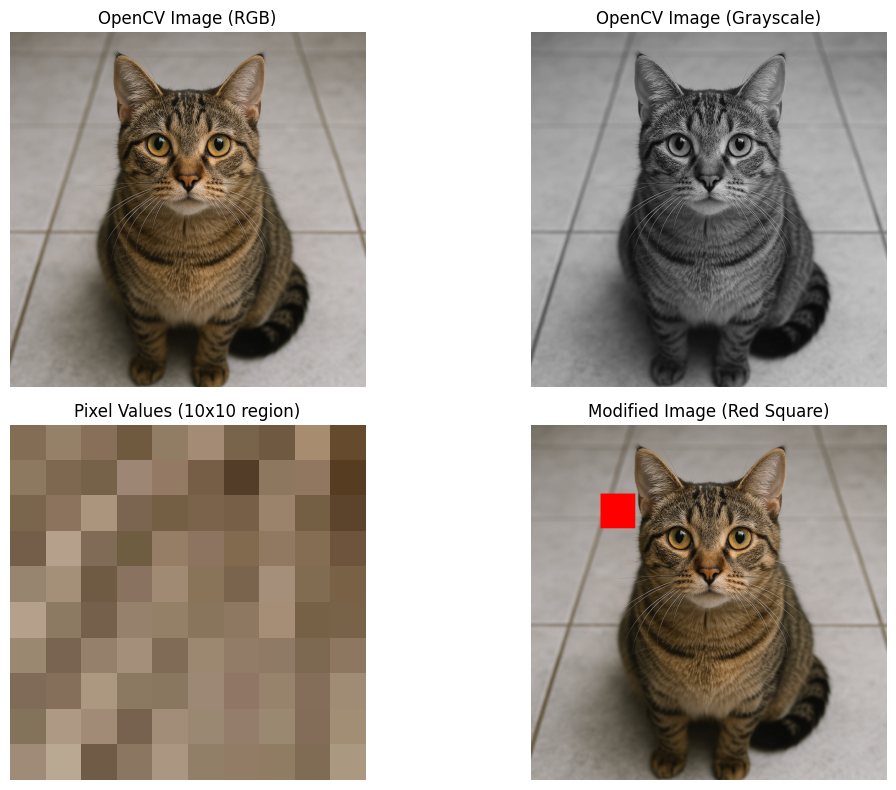

In [3]:
# Load an image using OpenCV (BGR format by default)
img_cv = cv2.imread('../assets/sample_image.png')
# Convert BGR to RGB for display
img_cv_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
# Create a grayscale version
img_cv_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Display images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('OpenCV Image (RGB)')
plt.imshow(img_cv_rgb)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('OpenCV Image (Grayscale)')
plt.imshow(img_cv_gray, cmap='gray')
plt.axis('off')

# Understanding pixel values and neighborhoods
plt.subplot(2, 2, 3)
plt.title('Pixel Values (10x10 region)')
# Get a small region of the image
x, y = 500, 500
window_size = 10
small_region = img_cv_rgb[y:y+window_size, x:x+window_size]
plt.imshow(small_region)
plt.axis('off')

# Print shape and data type information
print(f"Image shape: {img_cv_rgb.shape}")
print(f"Image data type: {img_cv_rgb.dtype}")
print(f"Pixel value at (100,100): {img_cv_rgb[100, 100]}")

# Accessing and manipulating pixel values
# Create a copy to manipulate
img_modified = img_cv_rgb.copy()
# Set a region to red
img_modified[200:300, 200:300, 0] = 255  # Red channel
img_modified[200:300, 200:300, 1:3] = 0  # Green and Blue channels

plt.subplot(2, 2, 4)
plt.title('Modified Image (Red Square)')
plt.imshow(img_modified)
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
# Function to apply a filter to an image using convolution
def apply_filter(image, filter_kernel):
    # Get dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = filter_kernel.shape
    
    # Calculate padding needed
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Create output image
    output = np.zeros((image_height, image_width))
    
    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Apply convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Apply the filter (element-wise multiplication and sum)
            output[i, j] = np.sum(region * filter_kernel)

    
    return abs(output)


In [1]:
def create_gaussian_kernel(size, sigma=1.0):
    """
    Create a Gaussian kernel of the specified size.
    
    Parameters:
    size (int): Size of the kernel (must be odd)
    sigma (float): Standard deviation of the Gaussian distribution
    
    Returns:
    numpy.ndarray: Normalized Gaussian kernel
    """
    if size % 2 == 0:
        size = size + 1  # Ensure size is odd
    
    # Create a 1D coordinate grid
    k = (size - 1) // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    
    # Calculate the 2D Gaussian distribution
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel so it sums to 1
    return kernel / kernel.sum()


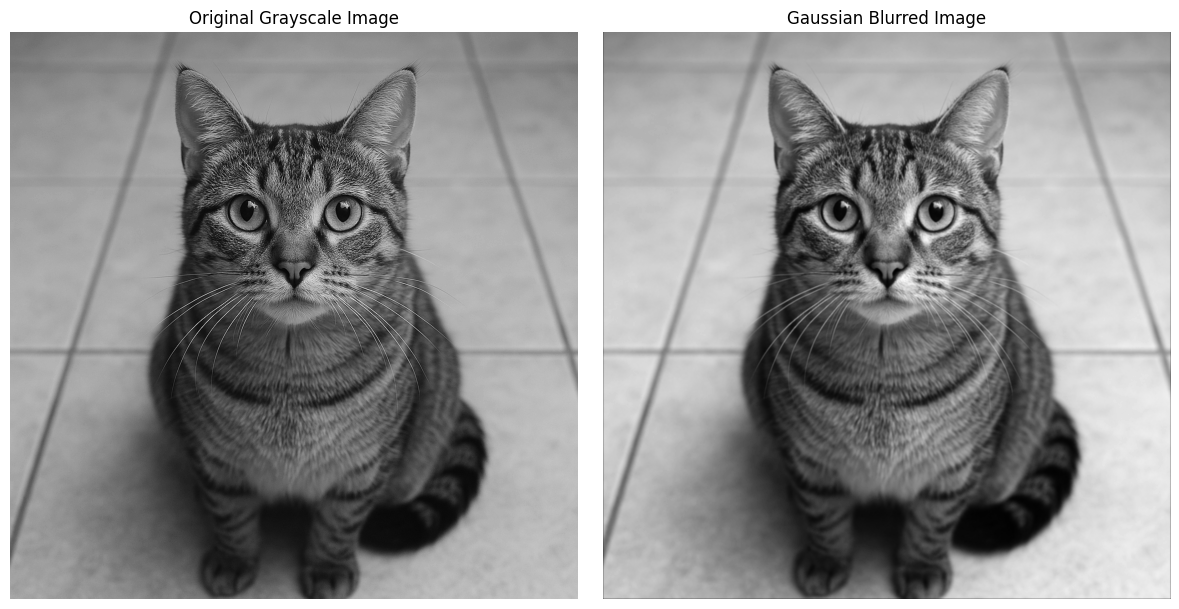

In [13]:
# Convert the image to grayscale for filtering
img_gray = cv2.cvtColor(img_cv_rgb, cv2.COLOR_RGB2GRAY)

# Create a simplified Gaussian blur kernel explicitly
# 5x5 Gaussian kernel with sigma approximately 1.0
gaussian_filter = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256  # Normalize the kernel (sum = 1)
# Create a larger 15x15 Gaussian kernel (3 times bigger)
# This will create a stronger blurring effect
# gaussian_filter = np.array([
#     [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 1, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0],
#     [0, 0, 1, 2, 3, 5, 6, 7, 6, 5, 3, 2, 1, 0, 0],
#     [0, 1, 2, 4, 6, 8, 10, 11, 10, 8, 6, 4, 2, 1, 0],
#     [0, 1, 3, 6, 9, 12, 15, 16, 15, 12, 9, 6, 3, 1, 0],
#     [0, 2, 5, 8, 12, 16, 20, 21, 20, 16, 12, 8, 5, 2, 0],
#     [1, 3, 6, 10, 15, 20, 24, 26, 24, 20, 15, 10, 6, 3, 1],
#     [1, 3, 7, 11, 16, 21, 26, 28, 26, 21, 16, 11, 7, 3, 1],
#     [1, 3, 6, 10, 15, 20, 24, 26, 24, 20, 15, 10, 6, 3, 1],
#     [0, 2, 5, 8, 12, 16, 20, 21, 20, 16, 12, 8, 5, 2, 0],
#     [0, 1, 3, 6, 9, 12, 15, 16, 15, 12, 9, 6, 3, 1, 0],
#     [0, 1, 2, 4, 6, 8, 10, 11, 10, 8, 6, 4, 2, 1, 0],
#     [0, 0, 1, 2, 3, 5, 6, 7, 6, 5, 3, 2, 1, 0, 0],
#     [0, 0, 0, 1, 1, 2, 3, 3, 3, 2, 1, 1, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
# ]) / 833  # Normalize the kernel (sum = 1)

# gaussian_filter = create_gaussian_kernel(50, 25)
# Apply the Gaussian filter to the grayscale image
blurred_img = apply_filter(img_gray, gaussian_filter)

# Normalize the output for display
blurred_img_normalized = (blurred_img - blurred_img.min()) / (blurred_img.max() - blurred_img.min())

# Plot the original grayscale and the blurred image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(blurred_img_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



In [10]:
def create_gaussian_kernel(size, sigma=1.0):
    """
    Create a Gaussian kernel of the specified size.
    
    Parameters:
    size (int): Size of the kernel (must be odd)
    sigma (float): Standard deviation of the Gaussian distribution
    
    Returns:
    numpy.ndarray: Normalized Gaussian kernel
    """
    if size % 2 == 0:
        size = size + 1  # Ensure size is odd
    
    # Create a 1D coordinate grid
    k = (size - 1) // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    
    # Calculate the 2D Gaussian distribution
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel so it sums to 1
    return kernel / kernel.sum()
